In [1]:
# ==============================================================================
# 1. SETUP & LIBRARY IMPORT
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Library XGBoost (Bintang Utamanya)
from xgboost import XGBClassifier

# Library Evaluasi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Konfigurasi Visualisasi
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Library berhasil di-import. Siap menggunakan XGBoost.")

✅ Library berhasil di-import. Siap menggunakan XGBoost.


In [2]:
# ==============================================================================
# 2. MEMUAT DATA PREPROCESSED
# ==============================================================================
# Lokasi data relative terhadap notebook ini (Mundur 3 folder)
DATA_PATH = "../../../data/"

try:
    print("📂 Sedang memuat data dari folder 'data/'...")

    # Load Data Latih (X_train & y_train - Sudah Balanced & Scaled)
    X_train = pd.read_csv(DATA_PATH + "X_train_final.csv")
    y_train = pd.read_csv(DATA_PATH + "y_train_final.csv").values.ravel()

    # Load Data Uji (X_test & y_test - Data Murni)
    X_test = pd.read_csv(DATA_PATH + "X_test_final.csv")
    y_test = pd.read_csv(DATA_PATH + "y_test_final.csv").values.ravel()

    # Load Label Encoder
    le = joblib.load(DATA_PATH + "label_encoder.pkl")
    class_names = le.classes_

    print("✅ Data berhasil dimuat!")
    print(f"   - Data Latih : {X_train.shape[0]} baris")
    print(f"   - Data Uji   : {X_test.shape[0]} baris")
    print(f"   - Target Label: {dict(zip(le.classes_, le.transform(le.classes_)))}")

except FileNotFoundError:
    print("❌ Error: File data tidak ditemukan.")

📂 Sedang memuat data dari folder 'data/'...
✅ Data berhasil dimuat!
   - Data Latih : 45080 baris
   - Data Uji   : 5091 baris
   - Target Label: {'Excellent': np.int64(0), 'Fair': np.int64(1), 'Good': np.int64(2), 'Marginal': np.int64(3)}


In [3]:
# ==============================================================================
# 3. PELATIHAN MODEL (XGBOOST TRAINING)
# ==============================================================================
print("🔄 Sedang melatih model XGBoost...")

# Inisialisasi Model XGBoost
# - n_estimators=100 : Jumlah siklus perbaikan kesalahan
# - learning_rate=0.1 : Seberapa cepat dia belajar (jangan terlalu besar biar gak 'grusa-grusu')
# - eval_metric='mlogloss': Cara dia mengukur error (standar klasifikasi multi-kelas)
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,            
    random_state=42,
    eval_metric='mlogloss'  
)

# Proses Fitting
xgb_model.fit(X_train, y_train)

print("✅ Pelatihan Selesai! Model XGBoost siap dievaluasi.")

🔄 Sedang melatih model XGBoost...
✅ Pelatihan Selesai! Model XGBoost siap dievaluasi.


In [4]:
# ==============================================================================
# 4. EVALUASI MODEL
# ==============================================================================
print("📊 Mengevaluasi XGBoost pada Data Uji (Test Set)...")

# Prediksi Label
y_pred = xgb_model.predict(X_test)

# A. Hitung Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔹 Akurasi (Accuracy): {accuracy * 100:.2f}%")

# B. Laporan Klasifikasi Lengkap
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

📊 Mengevaluasi XGBoost pada Data Uji (Test Set)...

🔹 Akurasi (Accuracy): 99.45%

🔹 Classification Report:
              precision    recall  f1-score   support

   Excellent       1.00      1.00      1.00      2818
        Fair       0.83      0.94      0.88        69
        Good       1.00      0.99      0.99      2188
    Marginal       0.93      0.88      0.90        16

    accuracy                           0.99      5091
   macro avg       0.94      0.95      0.94      5091
weighted avg       0.99      0.99      0.99      5091



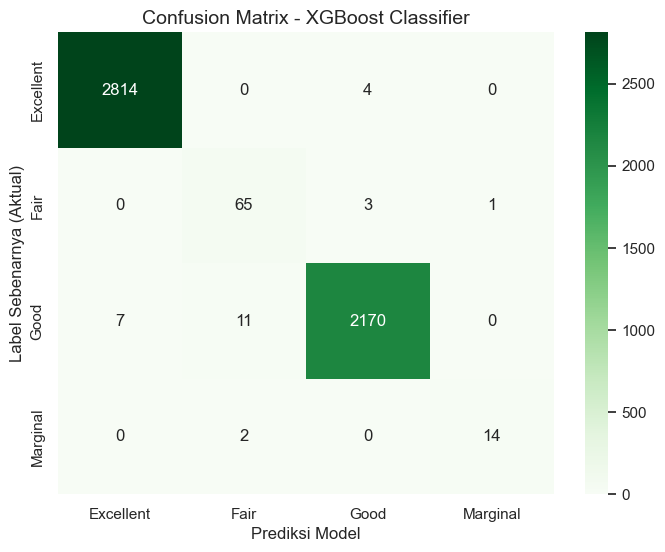

In [5]:
# ==============================================================================
# 5. VISUALISASI CONFUSION MATRIX
# ==============================================================================
plt.figure(figsize=(8, 6))

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', # Ganti warna jadi Hijau biar beda dikit
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Confusion Matrix - XGBoost Classifier', fontsize=14)
plt.xlabel('Prediksi Model', fontsize=12)
plt.ylabel('Label Sebenarnya (Aktual)', fontsize=12)
plt.show()

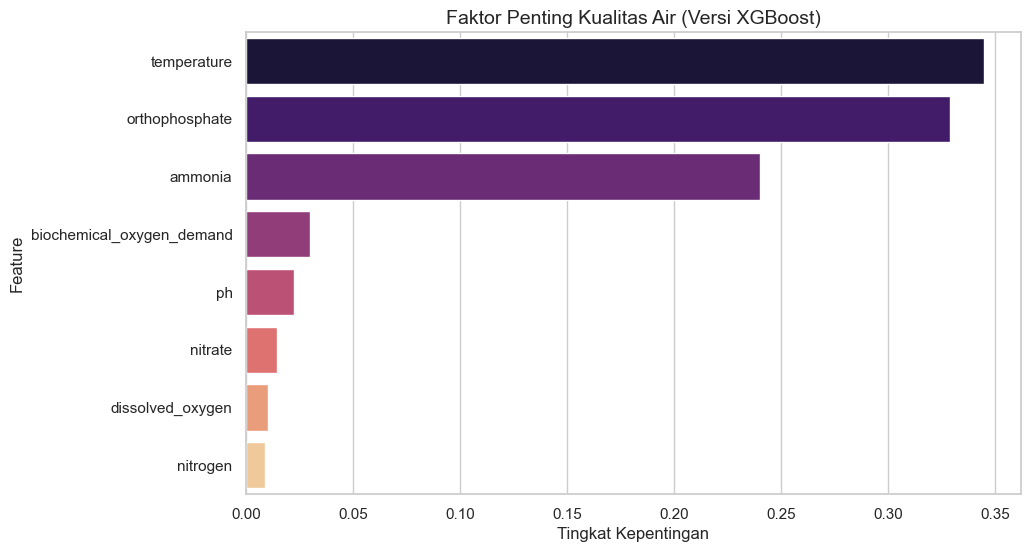

Analisis: Bandingkan urutan fitur ini dengan Random Forest. Apakah sama?


In [6]:
# ==============================================================================
# 6. ANALISIS PENTINGNYA FITUR (FEATURE IMPORTANCE)
# ==============================================================================
# Mengambil tingkat kepentingan fitur
importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Membuat DataFrame
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Bar Chart
plt.figure(figsize=(10, 6))
# hue='Feature' dan legend=False untuk menghindari warning
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='magma', hue='Feature', legend=False)

plt.title('Faktor Penting Kualitas Air (Versi XGBoost)', fontsize=14)
plt.xlabel('Tingkat Kepentingan')
plt.show()

print("Analisis: Bandingkan urutan fitur ini dengan Random Forest. Apakah sama?")

In [ ]:
# ==============================================================================
# 7. SIMPAN MODEL 
# ==============================================================================
import joblib

# Simpan Model Akhir
model_filename = 'xgb_model_final.pkl'
joblib.dump(xgb_model, model_filename)

print(f"✅ Model berhasil disimpan sebagai: {model_filename}")
print("⚠️ Visualisasi Tree dilewati (Graphviz issue). Tidak masalah, lanjut ke SVM!") 

✅ Model berhasil disimpan sebagai: xgb_model_final.pkl
⚠️ Visualisasi Tree dilewati (Graphviz issue). Tidak masalah, lanjut ke SVM!
